# Hoja de Trabajo #5 - (Numpy, Pandas, Vectorización)

In [1]:
import pandas as pd
import numpy as np

Desarrollar los siguientes ejercicios y subir el Notebook actualizado a su **repositorio de GitHub**. El entregable debe ser el link del archivo en su repositorio, **cualquier otra forma de entregable no sera aceptada**.

# Numpy

## Ejercicio 1: Crear un conjunto de datos lineal

Crear un conjunto de datos simple que consta de una sola característica y una etiqueta de la siguiente manera:

1. Asigne una secuencia de números enteros del 6 al 20 (incluyendo 20) a un arreglo de NumPy llamado `caracteristica`.
2. Asigne 15 valores a un arreglo de NumPy llamado `etiqueta` de manera que:

```
    etiqueta = (3) (caracteristica) + 4
```
Por ejemplo, el primer valor de `etiqueta` debería ser:

```
   etiqueta = (3) (6) + 4 = 22
```

In [35]:
# Desarrollar solucion

caracteristica = np.arange(6,21,1)
etiqueta = np.empty_like(caracteristica)
etiqueta = 3*(caracteristica) +4
etiqueta

(15,)

## Ejercicio 2: agregar ruido al conjunto de datos

Inserte un ruido aleatorio en cada elemento de la matriz `etiqueta` que ya creó. Para ser más precisos, modifique cada valor asignado a `etiqueta` agregando un valor "floating-point" aleatorio *diferente* entre -2 y +2.

No utilice broadcasting. En su lugar, cree un arreglo de `ruido` que tenga la misma dimensión que `etiqueta`.

In [36]:
# Desarrollar solucion
#ruido = np.empty_like(etiqueta)
ruido = np.random.uniform(-2.0,2.0,size = etiqueta.shape)
etiqueta = etiqueta + ruido
etiqueta

array([23.90502545, 24.04055096, 26.77364336, 30.40548283, 32.77196716,
       38.17407481, 39.48627438, 41.14453131, 45.81490331, 47.04486677,
       51.57799805, 56.50341779, 56.7242615 , 62.42966202, 62.79594241])

# Pandas

## Ejericio 3: Crear un DataFrame

Hacer lo siguiente:

   1. Cree un pandas DataFrame de 10x3 (10 filas x 3 columnas) en el que las columnas se denominen "Data Warehouse", "Python in Data Science", y "Estadistica Aplicada". Llene cada una de las 30 celdas del DataFrame con un número entero aleatorio entre 0 y 100, incluyendo 100.

   2. Despliege lo siguiente:

      * Todo el DataFrame
      * Las primeras 5 filas del DataFrame
      * Las ultimas 5 filas del DataFrame
      * El valor en la celda de la fila # 1 de la columna "Data Warehouse"
      * El valor en la celda de la fila # 3 de la columna "Estadistica Aplicada" 

   3. Cree una cuarta columna llamada "Promedio", que se rellena con el promedio fila por fila de las otras 3 columnas ("Data Warehouse", "Python in Data Science", y "Estadistica Aplicada"). Debe de usar la funcion de Numpy para calcular el promedio.

Para completar esta parte, es útil entender los conceptos básicos de NumPy cubiertos en clase y en la seccion anterior.

In [56]:
# Desarrollar solucion
#--------------------------1-----------------------
cols = ['Data Warehouse', 'Python in Data Science', 'Estadistica Aplicada']
dic = {i : np.random.randint(0,101,10) for i in cols}
df = pd.DataFrame(dic)
#--------------------------2-----------------------
print('--------------\n')
print(df)
print('--------------\n')
print(df[:5])
print('--------------\n')
print(df[5:])
print('--------------\n')
print(df['Data Warehouse'][0])
print('--------------\n')
print(df['Estadistica Aplicada'][2])
print('--------------\n')
#----------------------------3---------------------
df['Promedio'] = df.apply(lambda x: np.average(x), axis=1)
df

--------------

   Data Warehouse  Python in Data Science  Estadistica Aplicada
0               7                      87                    69
1               7                      78                    47
2               9                      74                    12
3              91                      95                    71
4              47                      85                    18
5              60                      38                    86
6              42                      22                    97
7              66                      83                    76
8              55                      80                    22
9              85                      13                    41
--------------

   Data Warehouse  Python in Data Science  Estadistica Aplicada
0               7                      87                    69
1               7                      78                    47
2               9                      74                    12
3       

,Data Warehouse,Python in Data Science,Estadistica Aplicada,Promedio
0,7,87,69,54.333333
1,7,78,47,44.000000
2,9,74,12,31.666667
3,91,95,71,85.666667
4,47,85,18,50.000000
5,60,38,86,61.333333
6,42,22,97,53.666667
7,66,83,76,75.000000
8,55,80,22,52.333333
9,85,13,41,46.333333


# Vectorización

## Ejericio 4: Vectorización

A continuacion, se le presenta un problema el cual debera resolver de dos formas distintas. La primera es utilizando un `for loop`, la segunda usando `vectorización`. Luego debe de comparar comprar el resultado de ambas implementaciones, tanto el valor resultante de la operacion, como el tiempo que toma la ejecucion de cada una.



**Problema:**

Dada una secuencia de precios historicos para una acción, y suponiendo que solo se le permite realizar una compra y una venta, ¿cuál es la ganancia máxima que se puede obtener? 

Por ejemplo, dados los precios = (20, 18, 14, 17, 20, 21, 13), el beneficio máximo sería 7, de comprar a 14 y vender a 21. Notar que el arreglo es una secuencia, por lo tanto no es factible solo utilizar los valores menores y mayores, ya que el valor mayor debe de estar obligatoriamente en una posicion futura al menor, por eso el mejor precio de compra es 14 y no 13.

Para este ejemplo utilice el siguiente codigo para generar el dataset (secuencia de precios historicos), asegurese de tambien incluir el "random seed" para obtener reproducibilidad.  

In [102]:
# Seed para reproducibilidad
np.random.seed(42)
# Creamos un arreglo que en su mayoria contiene Nans con algunos "puntos de inflexion" (local min/max).
precios = np.full(100, fill_value=np.nan)
precios[[0, 25, 60, -1]] = [80., 30., 75., 50.]

# De manera lineal interpolamos los valores faltantes y agregamos ruido.
x = np.arange(len(precios))
es_valido = ~np.isnan(precios)
precios = np.interp(x=x, xp=x[es_valido], fp=precios[es_valido])
precios += np.random.randn(len(precios)) * 2
precios

array([80.99342831, 77.7234714 , 77.29537708, 77.04605971, 71.53169325,
       69.53172609, 71.15842563, 67.53486946, 63.06105123, 63.08512009,
       59.07316461, 57.06854049, 56.48392454, 50.17343951, 48.55016433,
       48.87542494, 45.97433776, 46.62849467, 42.18395185, 39.1753926 ,
       42.93129754, 37.5484474 , 36.13505641, 31.15050363, 30.91123455,
       30.22184518, 28.98372713, 33.32282461, 32.65586548, 34.55946964,
       35.2251582 , 41.41884208, 38.97300555, 38.17029243, 43.2165184 ,
       40.41545556, 44.56058433, 41.50923118, 44.05791362, 48.39372247,
       50.76264745, 50.91416513, 51.62584629, 52.54064975, 51.47152745,
       54.2745973 , 56.07872246, 60.39995874, 60.25866515, 57.33106255,
       62.79102508, 62.65840687, 63.36044171, 67.22335258, 69.34771333,
       70.43398881, 68.17870781, 70.52443239, 73.09109829, 75.66537597,
       74.04165152, 73.98765641, 71.50527877, 70.68450983, 74.06094908,
       74.50735185, 71.00982591, 72.51988631, 70.59506692, 67.94

Ejemplo de lo que se busca calcular: 

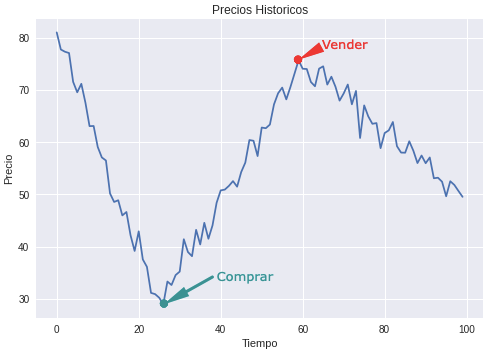

In [103]:
# Desarrollar solucion
from time import time
#Con ciclos
inicio = time()
x = -1
max = np.NINF
for i in precios:
    x = x+1
    for j in precios[x:]:
        if j-i > max:
            max = j-i
print(max)
fin = time()
print("\nEl tiempo de CICLOS en segundos es de: {}".format(fin-inicio))

#Con vectorizacion
inicio = time()
vec = np.array(precios)
vec2 = np.reshape(vec, (vec.shape[0],1))
mtrx = vec2 - vec
print(np.tril(mtrx).max())
fin = time()
print("\nEl tiempo de VECTORIZACION en segundos es de: {}".format(fin-inicio))

46.68164883766076

El tiempo de CICLOS en segundos es de: 0.002994537353515625
46.68164883766076

El tiempo de VECTORIZACION en segundos es de: 0.0009958744049072266
